![example](images/director_shot.jpeg)

# IMDB Project Phase 1

**Authors:** Brett Zimmerman, Sanjit Varma, Douglas Lu, Tony Bai
***

## Overview

Microsoft is attempting to break into original content film making by creating a new movie studio. Using data from online movie resource websites such as Rotten Tomatoes and IMDB, our group analyzed historical data (focusing on "financial success") and its relationship compared to time of release, genres and film length to provide insights that can help guide Microsoft Studios in their new venture to become an industry leader down the road.

## Business Problem

To help Microsoft produce a successful movie, box office films were used to find insights on what makes a film successful. Using these insights discovered through data exploration, we are to formulate three actionable recommendations for Microsoft Studios that will act as a guide in the studio's decision-making on what type of film to produce


## Assumptions
* We have defined Financial Success as Profits being greater than 1.5x the budget. We concluded that for its first film, if Microsoft Studios profits around 1.5x the budget, investors will be paid back in full with possibly some interest. After marketing fees and variable compensation to actors, that would still leave some profit for Microsoft Studios.


## Data Understanding

* The Data used in this project includes data on movie actors, budget and worldwide/domestic gross figures. The data set come from online movie database such as IMDB, The Numbers and The Movie DB
* Our analysis will focus on movies from 2010-2019
* We intend to explore, seasonality/release month, genres and film length and how it compares to the success rate of a movie
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline

In [ ]:
# Here you run your code to explore the data
dfbom = pd.read_csv('data/zippeddata/bom.movie_gross.csv')

df_imdb_name = pd.read_csv('data/zippeddata/imdb.name.basics.csv')

df_imdb_titleb = pd.read_csv('data/zippeddata/imdb.title.basics.csv')

df = pd.read_csv('data/zippeddata/bom.movie_gross.csv')
df.info()
df.head()

df_imdb_title = pd.read_csv('data/zippeddata/imdb.title.crew.csv')

df_imdb_principals = pd.read_csv('data/zippeddata/imdb.title.principals.csv')

df_imdb_ratings = pd.read_csv('data/zippeddata/imdb.title.ratings.csv')

tsv_file='data/zippeddata/rt.movie_info.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('rt.movie_info.csv',index=False)


tsv_file='data/zippeddata/rt.reviews.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('rt.reviews.csv',index=False)


df_tmdb_movies = pd.read_csv('data/zippeddata/tmdb.movies.csv')


df_budget = pd.read_csv('data/zippeddata/tn.movie_budgets.csv')





## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [224]:

# cleaned the tdmb Budget data set
# converted the last 3 col to float and removed the $

df_budget[df_budget.columns[3:6]] = df_budget[df_budget.columns[3:6]].replace('[\$,]', '', 
                                                                              regex=True).astype(float)

# created another row to determine wether the film grossed a profit
df_budget['profit'] = df_budget['worldwide_gross']- df_budget['production_budget']

# created a row of booleans returning True if profit exceeds 0
df_budget['fin_success'] =  (df_budget['profit'] > df_budget['production_budget']*1.5)



# # merged the two tables in order to have genre col
# df_imdb_comb = pd.merge(df_imdb_titleb,
#                         df_imdb_ratings, on='tconst')


#combined data frame from budget and imdb title to obtain a combined table with genre 
df_budget_genre = df_budget.merge(df_imdb_titleb, 
                                  left_on='movie', 
                                  right_on='primary_title') 

#clean the genres into rows so they can be categorized
df_budget_genre['genres'] = df_budget_genre['genres'].str.strip().str.split(',')
single_genre = df_budget_genre.explode('genres')



budget_genre= df_budget.merge(single_genre, left_on='movie', right_on='primary_title')

budget_genre.drop(columns=['id_x','movie_x', 'production_budget_x', 'id_y', 'release_date_y', 
                           'production_budget_y', 'domestic_gross_y', 'worldwide_gross_y', 
                           'profit_y', 'fin_success_y', 'tconst','primary_title', 
                           'original_title', 'start_year' ], inplace = True )


budget_genre['release_month'] = df_budget_genre['release_date'].map(lambda x : x[:3])


budget_genre['release_year'] = budget_genre['release_date_x'].map(lambda x : x[-4:]).astype(int)

budget_genre['release_year'].value_counts()


# picked 2008 because # of film start to decrease moving on from there
budget_genre = budget_genre.loc[(budget_genre['release_year'] > 2009) & (budget_genre['release_year'] < 2020)]



df_budget.groupby('fin_success')['profit'].count()

budget_genre.drop_duplicates(subset=['movie_y','genres'],keep='first',inplace=True)


budget_genre.groupby('release_year')['genres'].count()

release_year
2010    515
2011    579
2012    539
2013    575
2014    631
2015    819
2016    548
2017    433
2018    370
2019    148
Name: genres, dtype: int64

In [208]:
budget_genre.loc[budget_genre['genres'] == "Musical"]

,release_date_x,domestic_gross_x,worldwide_gross_x,profit_x,fin_success_x,movie_y,runtime_minutes,genres,release_month,release_year
176,"Mar 5, 2010",334191110.0,1.025491e+09,8.254911e+08,True,Alice in Wonderland,99.0,Musical,Mar,2010
433,"Mar 17, 2017",504014165.0,1.259200e+09,1.099200e+09,True,Beauty and the Beast,129.0,Musical,Dec,2017
1421,"Mar 13, 2015",201151353.0,5.345514e+08,4.395514e+08,True,Cinderella,150.0,Musical,Nov,2015
1646,"Dec 20, 2017",174340174.0,3.866656e+08,3.026656e+08,True,The Greatest Showman,105.0,Musical,Dec,2017
1911,"Jun 15, 2012",38518613.0,6.103193e+07,-8.968068e+06,False,Rock of Ages,123.0,Musical,Jan,2012
1990,"Dec 19, 2014",85911262.0,1.398296e+08,7.482962e+07,False,Annie,NaN,Musical,Jul,2014
2218,"Dec 25, 2014",128002372.0,2.131164e+08,1.569164e+08,True,Into the Woods,NaN,Musical,Feb,2014
2260,"Nov 24, 2010",39440655.0,9.055268e+07,3.555268e+07,False,Burlesque,119.0,Musical,Feb,2010
5805,"Nov 4, 2015",38322743.0,6.207614e+07,5.107614e+07,True,Brooklyn,83.0,Musical,NaN,2015
6364,"May 31, 2013",3827466.0,5.082747e+07,4.252747e+07,True,Yeh Jawaani Hai Deewani,160.0,Musical,NaN,2013


<ipython-input-209-aa5ae5cfcdbe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_film_length['length'] = df_film_length['runtime_minutes'].map(lambda x :


<AxesSubplot:xlabel='runtime_minutes', ylabel='profit_x'>

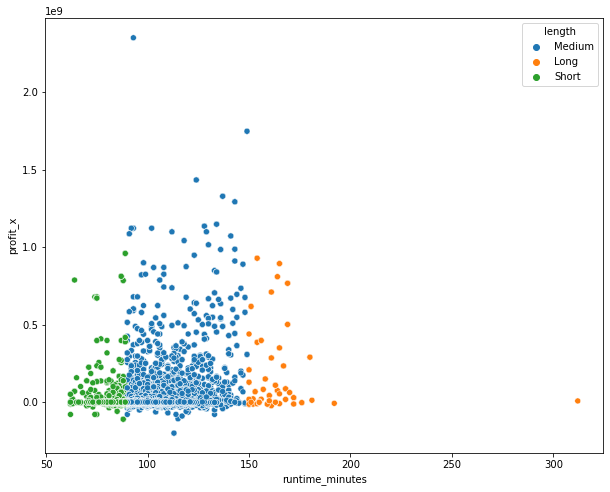

In [209]:
# analysis of run time vs success rate

budget_genre['runtime_minutes'].describe()

df_film_length = budget_genre[budget_genre['runtime_minutes'] > 60]

df_film_length.describe()


df_film_length['length'] = df_film_length['runtime_minutes'].map(lambda x : 
                                                                 'Short' if x < 90 
                                                                 else('Medium' if x < 150 else 'Long'))


length_total = dict(df_film_length.groupby('length')['genres'].count())
length_success = dict(df_film_length[df_film_length['fin_success_x'] == True].groupby('length')['genres'].count())

g1= length_success
g2= length_total

g3={x:float(g1[x])/g2[x] for x in g2}


fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_film_length, x="runtime_minutes", y="profit_x", hue="length", )


{'Long': 110, 'Medium': 4095, 'Short': 751}

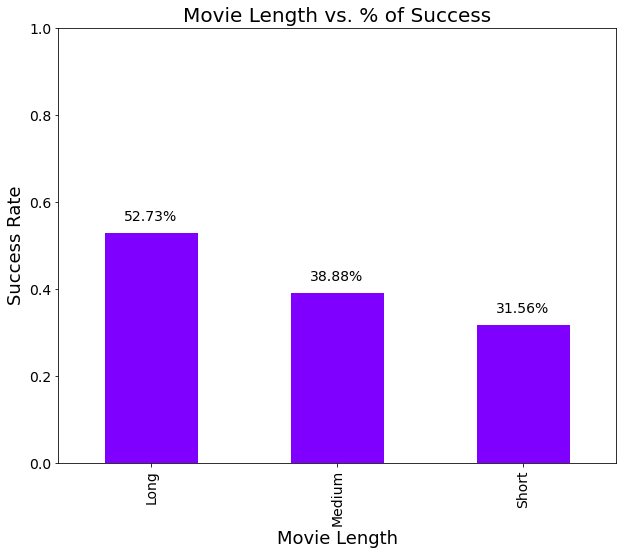

In [210]:
length_percent = pd.DataFrame.from_dict(g3, orient='index')


ax = length_percent.plot(kind='bar', figsize=(10, 8), fontsize=14, 
                         legend= False, colormap = 'rainbow', ylim=(0,1))

ax.set_title("Movie Length vs. % of Success", fontsize =20)
ax.set_ylabel('Success Rate', fontsize= 18)
ax.set_xlabel("Movie Length", fontsize=18)

for i in ax.patches:
    
    ax.text(i.get_x()+.1, i.get_height()+.03, \
            str(round((i.get_height())*100, 2))+'%', fontsize=14,
                color='black')
    
length_total

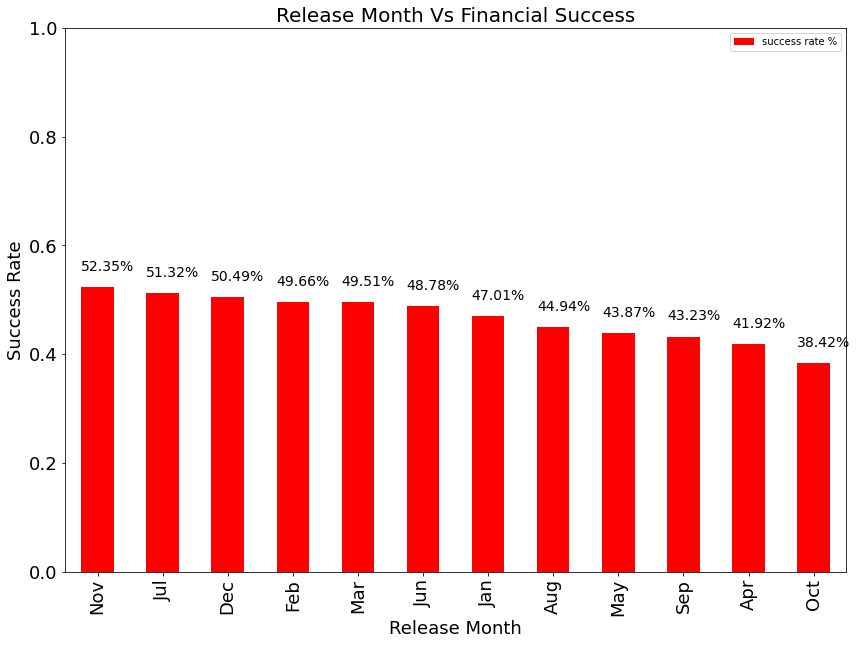

In [211]:
#cleaning slicing only the month from the data
# df_budget_genre['release_month'] = df_budget_genre['release_date'].map(lambda x : x[:3])


# df_budget_genre[df_budget_genre['fin_success'] == True].groupby('release_month')['id'].count()

#compiling the wins per month into a category 

month_success_total = dict(budget_genre[budget_genre['fin_success_x'] == True].groupby('release_month')['genres'].count())

month_total = dict(budget_genre.groupby('release_month')['genres'].count())
                   

m1= month_success_total
m2= month_total

m3={x:float(m1[x])/m2[x] for x in m2}

month_percent = pd.DataFrame.from_dict(m3, orient= 'index')

#rename the col

# .sort_values(by='id', ascending = False)

month_percent.rename(columns = {month_percent.columns[0] : "success rate %"}, inplace=True)

x= month_percent.sort_values(by = "success rate %", ascending = False)


ax = x.plot(kind ='bar', fontsize= 18, colormap = 'autumn', figsize =(14, 10), ylim = (0, 1) )

ax.set_title("Release Month Vs Financial Success", fontsize = 20)
ax.set_ylabel('Success Rate', fontsize= 18)
ax.set_xlabel("Release Month", fontsize=18)


#annotating the bar graph 



for i in ax.patches:
    
    ax.text(i.get_x(), i.get_height()+.03, \
            str(round((i.get_height())*100, 2))+'%', 
            fontsize=14, color='black')
    
#release month totals table

df_month_release_totals = pd.DataFrame.from_dict(m2, orient= 'index')
#rename col to count
df_month_release_totals.rename(columns = {df_month_release_totals.columns[0] : "# of Releases"}, inplace=True)







In [212]:



budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False) # sorted genres by data



genre_total= dict(budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False))



# budget_genre[budget_genre['fin_success'] == True].groupby('genres').count().sort_values('fin_success', ascending= False)

genre_success_total= dict(budget_genre[budget_genre['fin_success_x'] == True].groupby('genres')['genres'].count().sort_values(ascending = False))


#delete news and reality tv form data set

del genre_total['News']
del genre_total['Reality-TV']

len(genre_total)



genre_success_total

genre_total

#delete News from genre_success_total so that both lists match

# del genre_success_total['News']
# len(genre_total)== len(genre_success_total)
budget_genre

,release_date_x,domestic_gross_x,worldwide_gross_x,profit_x,fin_success_x,movie_y,runtime_minutes,genres,release_month,release_year
0,"Dec 18, 2009",760507625.0,2.776345e+09,2.351345e+09,True,Avatar,93.0,Horror,Dec,2009
1,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Action,May,2011
2,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Adventure,Jun,2011
3,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Fantasy,May,2011
4,"Jun 7, 2019",42762350.0,1.497624e+08,-2.002376e+08,False,Dark Phoenix,113.0,Action,Apr,2019
...,...,...,...,...,...,...,...,...,...,...
8745,"Dec 31, 2018",0.0,0.000000e+00,-7.000000e+03,False,Red 11,77.0,Sci-Fi,NaN,2018
8746,"Dec 31, 2018",0.0,0.000000e+00,-7.000000e+03,False,Red 11,77.0,Thriller,NaN,2018
8747,"Sep 29, 2015",0.0,0.000000e+00,-1.400000e+03,False,A Plague So Pleasant,76.0,Drama,NaN,2015
8748,"Sep 29, 2015",0.0,0.000000e+00,-1.400000e+03,False,A Plague So Pleasant,76.0,Horror,NaN,2015


Exploring Which Season would be best

In [213]:
# convert the release date col in order to use function
budget_genre['release_date_x'] = pd.to_datetime(budget_genre['release_date_x'])

#Function to convert month to season
def season_code_converter(month):
    season_code = month%12 // 3 + 1
    season_code_to_month = {1: 'Winter',
                            2: 'Spring',
                            3: 'Summer',
                            4: 'Fall'} 
    return season_code_to_month[season_code]

# new col for season
budget_genre['season'] = pd.DatetimeIndex(budget_genre['release_date_x']).month
for x in range(len(budget_genre)):
    budget_genre['season'].iloc[x] = (season_code_converter(budget_genre['release_date_x'].iloc[x].month))
    
budget_genre


/Users/tbai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,release_date_x,domestic_gross_x,worldwide_gross_x,profit_x,fin_success_x,movie_y,runtime_minutes,genres,release_month,release_year,season
0,2009-12-18,760507625.0,2.776345e+09,2.351345e+09,True,Avatar,93.0,Horror,Dec,2009,Winter
1,2011-05-20,241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Action,May,2011,Spring
2,2011-05-20,241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Adventure,Jun,2011,Spring
3,2011-05-20,241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Fantasy,May,2011,Spring
4,2019-06-07,42762350.0,1.497624e+08,-2.002376e+08,False,Dark Phoenix,113.0,Action,Apr,2019,Summer
...,...,...,...,...,...,...,...,...,...,...,...
8745,2018-12-31,0.0,0.000000e+00,-7.000000e+03,False,Red 11,77.0,Sci-Fi,NaN,2018,Winter
8746,2018-12-31,0.0,0.000000e+00,-7.000000e+03,False,Red 11,77.0,Thriller,NaN,2018,Winter
8747,2015-09-29,0.0,0.000000e+00,-1.400000e+03,False,A Plague So Pleasant,76.0,Drama,NaN,2015,Fall
8748,2015-09-29,0.0,0.000000e+00,-1.400000e+03,False,A Plague So Pleasant,76.0,Horror,NaN,2015,Fall


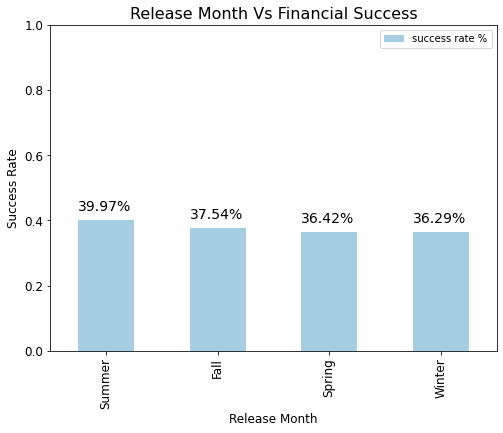

In [214]:
#exploring the Success rate per season 

season_success_total = dict(budget_genre[budget_genre['fin_success_x'] == True].groupby('season')['genres'].count())

season_total = dict(budget_genre.groupby('season')['genres'].count())
                   

s1= season_success_total
s2= season_total

s3={x:float(s1[x])/s2[x] for x in s2}

season_percent = pd.DataFrame.from_dict(s3, orient= 'index')

season_percent.rename(columns = {season_percent.columns[0] : "success rate %"}, inplace=True)

x= season_percent.sort_values(by = "success rate %", ascending = False)


ax = x.plot(kind ='bar', fontsize= 12, colormap = 'Paired', figsize =(8, 6), ylim = (0, 1) )

ax.set_title("Release Month Vs Financial Success", fontsize = 16)
ax.set_ylabel('Success Rate', fontsize= 12)
ax.set_xlabel("Release Month", fontsize=12)

for i in ax.patches:
    
    ax.text(i.get_x(), i.get_height()+.03, \
            str(round((i.get_height())*100, 2))+'%', 
            fontsize=14, color='black')


In [215]:
budget_genre[budget_genre['fin_success_x'] == True].groupby('genres')['genres'].count().sum()

1971

In [216]:
budget_genre.groupby('genres')['genres'].count().sum()


5253

In [217]:

 
# return the percentages of success of each genre

d1= genre_success_total
d2= genre_total

d3={x:float(d1[x])/d2[x] for x in d2}

d3={k: v for k, v in sorted(d3.items(), key=lambda item: item[1])}



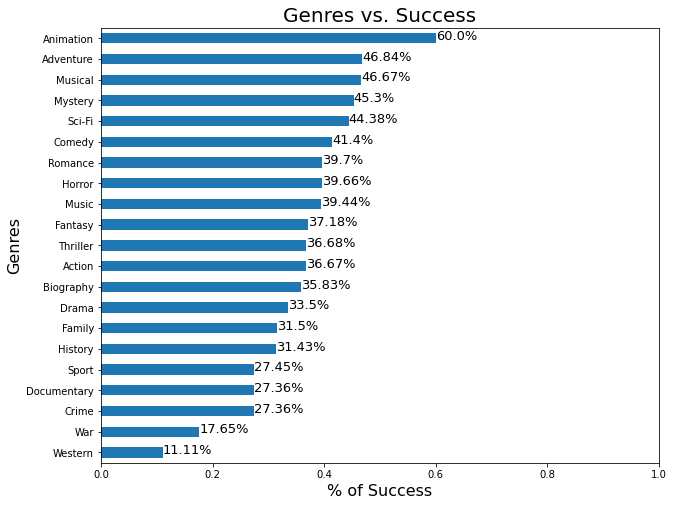

In [218]:
df_percentage = pd.DataFrame.from_dict(d3, orient= 'index')

ax = df_percentage.plot.barh(figsize =(10, 8), legend=False)
ax.set_title("Genres vs. Success", fontsize=20)
ax.set_ylabel('Genres', fontsize= 16)
ax.set_xlabel("% of Success", fontsize=16)
ax.set_xlim(0,1)




for i in ax.patches:
    
    ax.text(i.get_width(), i.get_y()+.18, \
            str(round((i.get_width())*100, 2)) +'%', fontsize=13, color='Black')


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [187]:
# Here you run your code to model the data




## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***